In [2]:
import numpy as np
import scipy
import matplotlib.pyplot as plt

p1 = np.loadtxt('database/upside.csv', delimiter=',', skiprows=1, dtype=float)
p2 = np.loadtxt('database/upside_down.csv', delimiter=',', skiprows=1, dtype=float)
p3 = np.loadtxt('database/roll_right.csv', delimiter=',', skiprows=1, dtype=float)
p4 = np.loadtxt('database/roll_left.csv', delimiter=',', skiprows=1, dtype=float)
p5 = np.loadtxt('database/pitch_forward.csv', delimiter=',', skiprows=1, dtype=float)
p6 = np.loadtxt('database/pitch_backwards.csv', delimiter=',', skiprows=1, dtype=float)

leituras_combinadas = np.concatenate((p1,p2,p3,p4,p5,p6))
print(leituras_combinadas)

[[ 1.96144000e-01  1.78802000e-01  9.29890000e+00 ... -4.92433000e-03
  -8.38467000e-03  1.74680236e+15]
 [ 1.99134000e-01  1.86576000e-01  9.29710600e+00 ... -5.32360000e-03
  -9.05012000e-03  1.74680238e+15]
 [ 2.06908000e-01  1.84184000e-01  9.29650800e+00 ... -5.45669000e-03
  -8.78394000e-03  1.74680240e+15]
 ...
 [ 1.00111180e+01 -5.50160000e-02 -8.48562000e-01 ... -5.19051000e-03
  -7.71922000e-03  1.74680202e+15]
 [ 1.00099220e+01 -5.98000000e-02 -8.51552000e-01 ... -5.05742000e-03
  -7.18686000e-03  1.74680204e+15]
 [ 1.00230780e+01 -6.21920000e-02 -8.56934000e-01 ... -5.19051000e-03
  -6.78759000e-03  1.74680206e+15]]


In [3]:
def costfunc1(x, data, scale):
    sum = 0.0
    
    vx = x[0]
    vy = x[1]
    vz = x[2]
    g = x[3]
    for aceleration_vector in data:
        sum = sum + (scale*np.sqrt((vx + aceleration_vector[0])**2 + (vy + aceleration_vector[1])**2 + (vz + aceleration_vector[2])**2) - g)**2
    return sum
    
def grad_costfunc1(x, data, scale):
    vector = np.zeros((4))

    vx = x[0]
    vy = x[1]
    vz = x[2]
    g = x[3]

    for aceleration_vector in data:
        R = np.sqrt((vx + aceleration_vector[0])**2 + (vy + aceleration_vector[1])**2 + (vz + aceleration_vector[2])**2)
        
        derivada_R_x = (vx + aceleration_vector[0])/R
        vector[0] =  vector[0] + 2*scale*derivada_R_x*(scale*R - g)

        derivada_R_y = (vy + aceleration_vector[1])/R
        vector[1] = vector[1] + 2*scale*derivada_R_y*(scale*R - g)

        derivada_R_z = (vz + aceleration_vector[2])/R
        vector[2] = vector[2] + 2*scale*derivada_R_z*(scale*R - g)

        vector[3] = vector[3] - 2*(scale*R - g)
    return vector

In [4]:
todas_as_leituras_plano = leituras_combinadas[:, :3]
print(todas_as_leituras_plano)
print(todas_as_leituras_plano.shape)
scale = 1

res1 = scipy.optimize.minimize(costfunc1, [0.0, 0.0, 0.0, 9.8],(todas_as_leituras_plano, scale), jac = grad_costfunc1)
print(res1)


[[ 0.196144  0.178802  9.2989  ]
 [ 0.199134  0.186576  9.297106]
 [ 0.206908  0.184184  9.296508]
 ...
 [10.011118 -0.055016 -0.848562]
 [10.009922 -0.0598   -0.851552]
 [10.023078 -0.062192 -0.856934]]
(30000, 3)


  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: 20.15736662904938
        x: [-2.387e-01 -2.195e-01  5.447e-01  9.806e+00]
      nit: 10
      jac: [-2.360e-07  3.703e-08 -1.081e-07 -2.787e-08]
 hess_inv: [[ 5.051e-05  5.676e-07  1.606e-06  4.292e-07]
            [ 5.676e-07  5.041e-05 -3.786e-08 -5.474e-08]
            [ 1.606e-06 -3.786e-08  5.035e-05 -2.888e-07]
            [ 4.292e-07 -5.474e-08 -2.888e-07  1.665e-05]]
     nfev: 17
     njev: 17


(array([7.000e+00, 4.700e+01, 2.170e+02, 7.310e+02, 1.662e+03, 2.996e+03,
        4.015e+03, 3.974e+03, 3.127e+03, 1.964e+03, 8.810e+02, 3.520e+02,
        2.260e+02, 2.750e+02, 5.070e+02, 7.200e+02, 1.022e+03, 1.302e+03,
        1.394e+03, 1.298e+03, 1.220e+03, 8.530e+02, 5.310e+02, 3.730e+02,
        1.690e+02, 8.700e+01, 2.900e+01, 1.500e+01, 4.000e+00, 2.000e+00]),
 array([9.75839991, 9.76278049, 9.76716107, 9.77154165, 9.77592222,
        9.7803028 , 9.78468338, 9.78906396, 9.79344454, 9.79782512,
        9.80220569, 9.80658627, 9.81096685, 9.81534743, 9.81972801,
        9.82410859, 9.82848916, 9.83286974, 9.83725032, 9.8416309 ,
        9.84601148, 9.85039205, 9.85477263, 9.85915321, 9.86353379,
        9.86791437, 9.87229495, 9.87667552, 9.8810561 , 9.88543668,
        9.88981726]),
 <BarContainer object of 30 artists>)

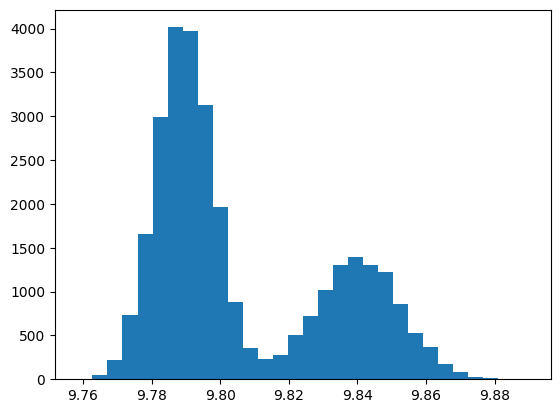

In [5]:
def calc_accel1(medida, parametros, scale):
    rx, ry, rz = medida
    rx += parametros[0]
    ry += parametros[1]
    rz += parametros[2]
    return scale*np.sqrt(rx**2 + ry**2 + rz**2)

medidas_g = [calc_accel1(m, res1.x, 1) for m in todas_as_leituras_plano]

plt.hist(medidas_g, bins=30)

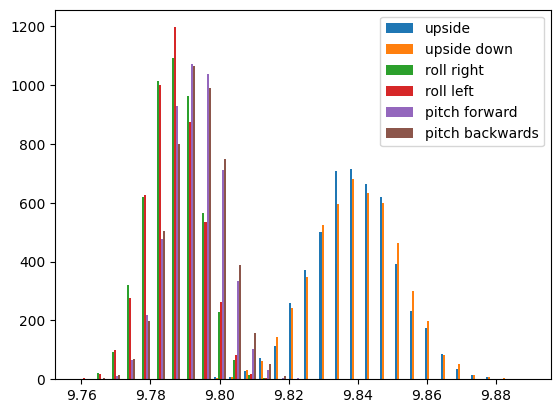

In [6]:
medidas_g_separadas = g_measures_split = [[calc_accel1(m, res1.x, scale) for m in leitura] for leitura in [p1[:, :3],p2[:, :3],p3[:, :3],p4[:, :3],p5[:, :3],p6[:, :3]]]
fig, ax = plt.subplots()
ax.hist(medidas_g_separadas ,bins =30, label=["upside", "upside down", "roll right", "roll left", "pitch forward", "pitch backwards"])
ax.legend ()

In [7]:
def costfunc2(x, data, g, scale):
    sum = 0.0
    
    vx = x[0]
    vy = x[1]
    vz = x[2]
    sx = x[3]
    sy = x[4]
    sz = x[5]
    for aceleration_vector in data:
        sum = sum + (scale*np.sqrt((sx**2)*(vx + aceleration_vector[0])**2 + (sy**2)*(vy + aceleration_vector[1])**2 + (sz**2)*(vz + aceleration_vector[2])**2) - g)**2
    return sum
    
def grad_costfunc2(x, data, g, scale):
    vector = np.zeros((6))

    vx = x[0]
    vy = x[1]
    vz = x[2]
    sx = x[3]
    sy = x[4]
    sz = x[5]

    for aceleration_vector in data:
        R = np.sqrt((sx**2)*(vx + aceleration_vector[0])**2 + (sy**2)*(vy + aceleration_vector[1])**2 + (sz**2)*(vz + aceleration_vector[2])**2)
        
        derivada_R_vx = (sx**2)*(vx + aceleration_vector[0])/R
        vector[0] =  vector[0] + 2*scale*derivada_R_vx*(scale*R - g)

        derivada_R_vy = (sy**2)*(vy + aceleration_vector[1])/R
        vector[1] = vector[1] + 2*scale*derivada_R_vy*(scale*R - g)

        derivada_R_vz = (sz**2)*(vz + aceleration_vector[2])/R
        vector[2] = vector[2] + 2*scale*derivada_R_vz*(scale*R - g)

        derivada_R_sx = (sx*(vx + aceleration_vector[0])**2)/R
        vector[3] = vector[3] + 2*scale*derivada_R_sx*(scale*R - g)

        derivada_R_sy = (sy*(vy + aceleration_vector[1])**2)/R
        vector[4] = vector[4] + 2*scale*derivada_R_sy*(scale*R - g)

        derivada_R_sz = (sz*(vz + aceleration_vector[2])**2)/R
        vector[5] = vector[5] + 2*scale*derivada_R_sz*(scale*R - g)

    return vector

In [8]:
res2 = scipy.optimize.minimize(costfunc2, [res1.x[0], res1.x[1], res1.x[2], 1.0, 1.0, 1.0], (todas_as_leituras_plano, 9.786366, 1), jac = grad_costfunc2)
print(res2)

  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: 2.721265656083531
        x: [-2.389e-01 -2.194e-01  5.450e-01  9.994e-01  1.000e+00
             9.945e-01]
      nit: 12
      jac: [ 1.226e-06 -5.355e-07 -8.142e-07 -4.270e-07 -4.840e-07
            -1.383e-06]
 hess_inv: [[ 4.995e-05  6.838e-07 ... -1.096e-07 -2.544e-08]
            [ 6.838e-07  4.987e-05 ...  6.875e-11 -1.195e-09]
            ...
            [-1.096e-07  6.875e-11 ...  5.230e-07 -9.342e-11]
            [-2.544e-08 -1.195e-09 ... -9.342e-11  5.163e-07]]
     nfev: 27
     njev: 27


(array([2.000e+00, 9.000e+00, 9.000e+00, 1.600e+01, 4.400e+01, 6.900e+01,
        1.720e+02, 2.630e+02, 5.580e+02, 8.970e+02, 1.518e+03, 2.456e+03,
        3.260e+03, 4.183e+03, 4.226e+03, 3.840e+03, 3.122e+03, 2.250e+03,
        1.358e+03, 7.690e+02, 4.630e+02, 2.310e+02, 1.360e+02, 7.700e+01,
        3.600e+01, 1.800e+01, 1.100e+01, 3.000e+00, 3.000e+00, 1.000e+00]),
 array([9.74081783, 9.74398467, 9.7471515 , 9.75031834, 9.75348517,
        9.756652  , 9.75981884, 9.76298567, 9.76615251, 9.76931934,
        9.77248617, 9.77565301, 9.77881984, 9.78198668, 9.78515351,
        9.78832034, 9.79148718, 9.79465401, 9.79782085, 9.80098768,
        9.80415451, 9.80732135, 9.81048818, 9.81365502, 9.81682185,
        9.81998868, 9.82315552, 9.82632235, 9.82948919, 9.83265602,
        9.83582285]),
 <BarContainer object of 30 artists>)

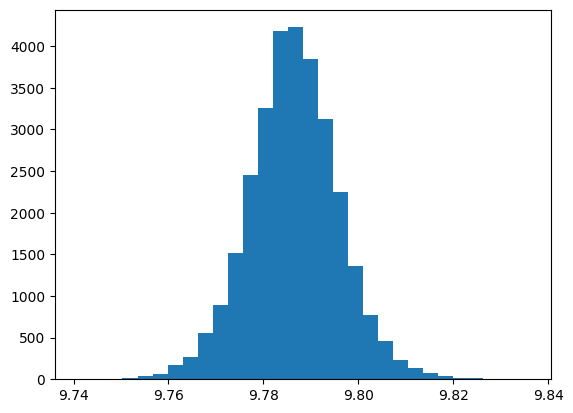

In [9]:
def calc_accel2(medida, parametros, scale):
    rx, ry, rz = medida
    rx = parametros[3]*(rx+parametros[0])
    ry = parametros[4]*(ry+parametros[1])
    rz = parametros[5]*(rz+parametros[2])
    return scale*np.sqrt(rx**2 + ry**2 + rz**2)

medidas_g2 = [calc_accel2(m, res2.x, 1) for m in todas_as_leituras_plano]

plt.hist(medidas_g2, bins=30)

In [10]:
print(f"Offsets de cada eixo: {res2.x[:3]}")
print(f"Ganhos de cada eixo: {res2.x[3:]}")

Offsets de cada eixo: [-0.23893592 -0.21940655  0.54497985]
Ganhos de cada eixo: [0.99936644 0.99999395 0.99451237]
